In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.212433636 W= 0.455353 b= -0.678752
Epoch: 0100 cost= 0.196784630 W= 0.443115 b= -0.590716
Epoch: 0150 cost= 0.182942972 W= 0.431606 b= -0.507917
Epoch: 0200 cost= 0.170699626 W= 0.420781 b= -0.430042
Epoch: 0250 cost= 0.159870148 W= 0.4106 b= -0.356798
Epoch: 0300 cost= 0.150291368 W= 0.401024 b= -0.287911
Epoch: 0350 cost= 0.141819000 W= 0.392017 b= -0.223121
Epoch: 0400 cost= 0.134325117 W= 0.383547 b= -0.162183
Epoch: 0450 cost= 0.127696872 W= 0.37558 b= -0.104871
Epoch: 0500 cost= 0.121834248 W= 0.368087 b= -0.0509666
Epoch: 0550 cost= 0.116648860 W= 0.36104 b= -0.000268361
Epoch: 0600 cost= 0.112062521 W= 0.354411 b= 0.0474146
Epoch: 0650 cost= 0.108006075 W= 0.348177 b= 0.0922617
Epoch: 0700 cost= 0.104418308 W= 0.342314 b= 0.134441
Epoch: 0750 cost= 0.101245098 W= 0.3368 b= 0.174113
Epoch: 0800 cost= 0.098438591 W= 0.331613 b= 0.211424
Epoch: 0850 cost= 0.095956385 W= 0.326735 b= 0.246517
Epoch: 0900 cost= 0.093761072 W= 0.322147 b= 0.279522
Epoch: 0950 cost=

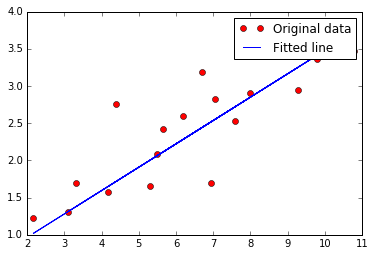

In [9]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()